# **Load the dataset**

In [ ]:
import pandas as pd

file_path = '/content/3b01bcb8-0b14-4abf-b6f2-c1bfd384ba69.csv'
aqi_data = pd.read_csv(file_path)

# Display the first few rows of the dataset
aqi_data.head()


,country,state,city,station,last_update,latitude,longitude,pollutant_id,pollutant_min,pollutant_max,pollutant_avg
0,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",7/8/2024 11:00,16.515083,80.518167,NH3,2.0,4.0,3.0
1,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",7/8/2024 11:00,16.515083,80.518167,SO2,21.0,24.0,22.0
2,India,Andhra_Pradesh,Anantapur,"Gulzarpet, Anantapur - APPCB",7/8/2024 11:00,14.675886,77.593027,PM10,58.0,92.0,71.0
3,India,Andhra_Pradesh,Chittoor,"Gangineni Cheruvu, Chittoor - APPCB",7/8/2024 11:00,13.204880,79.097889,NO2,7.0,9.0,9.0
4,India,Andhra_Pradesh,Kadapa,"Yerramukkapalli, Kadapa - APPCB",7/8/2024 11:00,14.465052,78.824187,PM10,NaN,NaN,NaN


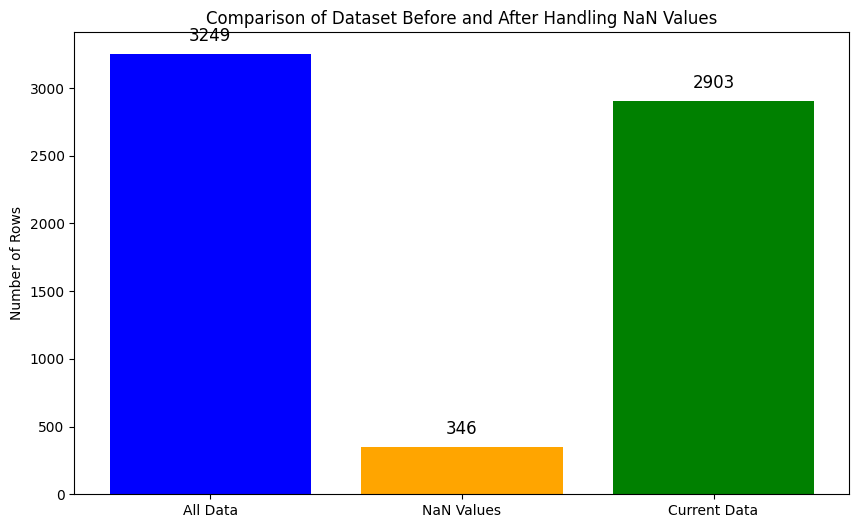

In [ ]:
import matplotlib.pyplot as plt

# Count the number of rows in the original dataset
total_rows = len(aqi_data)

# Count the number of rows with NaN values in 'pollutant_avg'
nan_count = aqi_data['pollutant_avg'].isna().sum()

# Count the number of rows in the cleaned dataset
current_rows = len(aqi_data_cleaned)

# Prepare the data for the plot
counts = [total_rows, nan_count, current_rows]
labels = ['All Data', 'NaN Values', 'Current Data']

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(labels, counts, color=['blue', 'orange', 'green'])

# Add labels and title
plt.ylabel('Number of Rows')
plt.title('Comparison of Dataset Before and After Handling NaN Values')

# Annotate the bars with the counts
for i, count in enumerate(counts):
    plt.text(i, count + 100, str(count), ha='center', fontsize=12)

plt.show()


# **Drop rows where 'pollutant_avg' has NaN values**

In [ ]:

aqi_data_cleaned = aqi_data.dropna(subset=['pollutant_avg'])
print(aqi_data_cleaned.head())


  country           state               city  \
0   India  Andhra_Pradesh          Amaravati   
1   India  Andhra_Pradesh          Amaravati   
2   India  Andhra_Pradesh          Anantapur   
3   India  Andhra_Pradesh           Chittoor   
6   India  Andhra_Pradesh  Rajamahendravaram   

                                          station     last_update   latitude  \
0                  Secretariat, Amaravati - APPCB  7/8/2024 11:00  16.515083   
1                  Secretariat, Amaravati - APPCB  7/8/2024 11:00  16.515083   
2                    Gulzarpet, Anantapur - APPCB  7/8/2024 11:00  14.675886   
3             Gangineni Cheruvu, Chittoor - APPCB  7/8/2024 11:00  13.204880   
6  Anand Kala Kshetram, Rajamahendravaram - APPCB  7/8/2024 11:00  16.987287   

   longitude pollutant_id  pollutant_min  pollutant_max  pollutant_avg  
0  80.518167          NH3            2.0            4.0            3.0  
1  80.518167          SO2           21.0           24.0           22.0  
2  77.59302

# **Define thresholds for pollutants and label each row as 0 or 1 based on thresholds**

In [ ]:

thresholds = {
    'PM10': 45,
    'PM2.5': 25,
    'CO': 4,
    'SO2': 40,
    'NO2': 25,
    'OZONE': 100,
    'NH3': 5
}

# Function to label each row as 0 or 1 based on thresholds
def label_row_numeric(row):
    pollutant = row['pollutant_id']
    avg_value = row['pollutant_avg']

    if pollutant in thresholds:
        if avg_value > thresholds[pollutant]:
            return 1  # Dangerous
        else:
            return 0  # Acceptable
    return None

# Apply the function to the dataset
aqi_data_cleaned['Safety_Label_Numeric'] = aqi_data_cleaned.apply(label_row_numeric, axis=1)

# Display the first few rows with the new numeric label
aqi_data_cleaned[['pollutant_id', 'pollutant_avg', 'Safety_Label_Numeric']].head()


<ipython-input-21-899c4a5abb9e>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aqi_data_cleaned['Safety_Label_Numeric'] = aqi_data_cleaned.apply(label_row_numeric, axis=1)


,pollutant_id,pollutant_avg,Safety_Label_Numeric
0,NH3,3.0,0
1,SO2,22.0,0
2,PM10,71.0,1
3,NO2,9.0,0
6,SO2,12.0,0


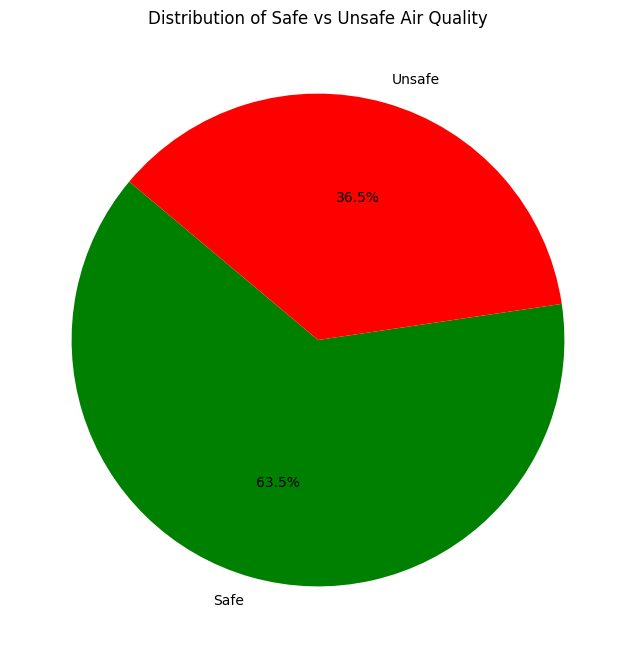

In [ ]:
import matplotlib.pyplot as plt

# Count the occurrences of each label (0 for safe, 1 for unsafe)
label_counts = aqi_data_cleaned['Safety_Label_Numeric'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(label_counts, labels=['Safe', 'Unsafe'], colors=['green', 'red'], autopct='%1.1f%%', startangle=140)

# Add a title
plt.title('Distribution of Safe vs Unsafe Air Quality')
plt.show()


# **Importing Sklearn for training the model on given dataset**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


# **Train above data to classify as dangerous or acceptable where feature is avg. pollutant and target is safety level**

In [ ]:

features = ['pollutant_avg']
target = 'Safety_Label_Numeric'

X = aqi_data_cleaned[features]
y = aqi_data_cleaned[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
# Train the classifier
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test)


# **Computing the confusion matrix**

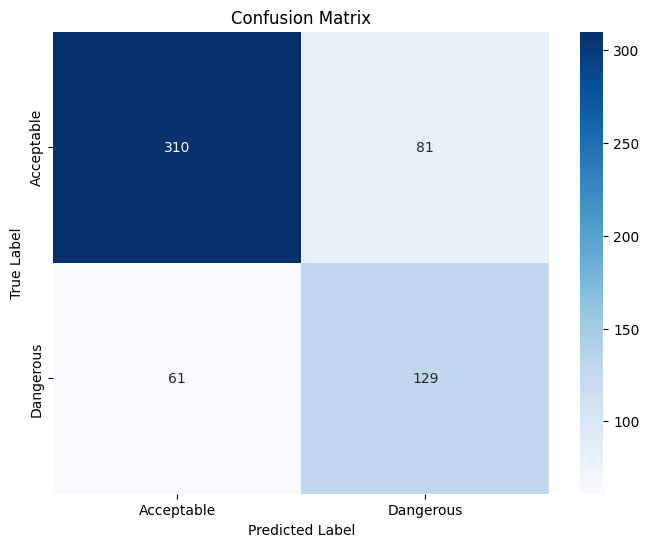

              precision    recall  f1-score   support

  Acceptable       0.84      0.79      0.81       391
   Dangerous       0.61      0.68      0.65       190

    accuracy                           0.76       581
   macro avg       0.72      0.74      0.73       581
weighted avg       0.76      0.76      0.76       581



In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
#

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Acceptable', 'Dangerous'], yticklabels=['Acceptable', 'Dangerous'])
plt.title('Confusion Matrix')
#
plt.xlabel('Predicted Label')

#
plt.ylabel('True Label')
#
plt.show()

# Print a classification report for additional metrics
print(classification_report(y_test, y_pred, target_names=['Acceptable', 'Dangerous']))


